# Names: Mariona Pla (1616474), Ares Sellart (1665890), Martina Carretta (1673930)

In [148]:
RANDOM_SEED = 0   #To have the same training and testing data set

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
data = pd.read_csv('salary.csv')
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [150]:
data['sex'][0]==' Male' # There is a space in front of the sex category

True

# Study of the database

---
* Check the form of the database and handle the NaN Values
---

In [151]:
print('Number of rows:', data.shape[0])
print('Number of columns:', data.shape[1])
print('Number of duplicate rows:', data.duplicated().sum())
data.drop_duplicates(keep='first', inplace=True)
print('Number of duplicate rows:', data.duplicated().sum())

Number of rows: 32561
Number of columns: 15
Number of duplicate rows: 24
Number of duplicate rows: 0


In [152]:
data.isnull().sum() # NaN values?

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [153]:
data = data.replace([' ?'], np.nan) # We see that the NaN values are " ?"" so we replace them

In [154]:
data.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     582
salary               0
dtype: int64

In [155]:
data.dropna(axis=0, how='any', inplace=True) # Drop them in place
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [156]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

# Graphics

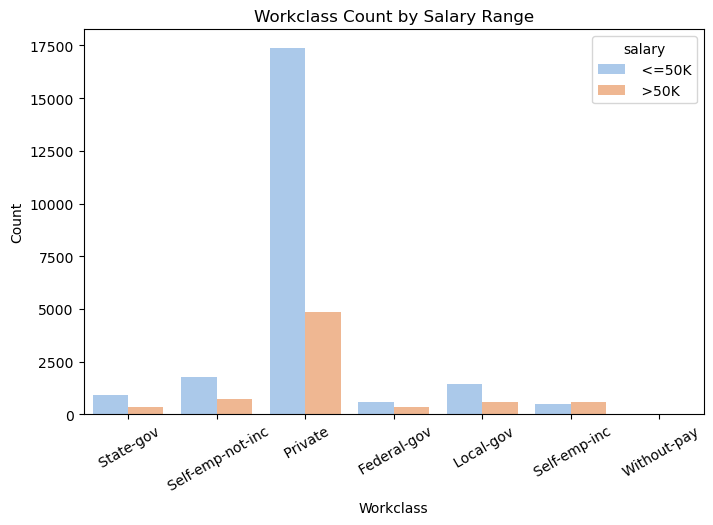

In [157]:
plt.figure(figsize=(8, 5))
sns.countplot(x='workclass', data=data, hue='salary', palette='pastel')
plt.title('Workclass Count by Salary Range')
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.show()

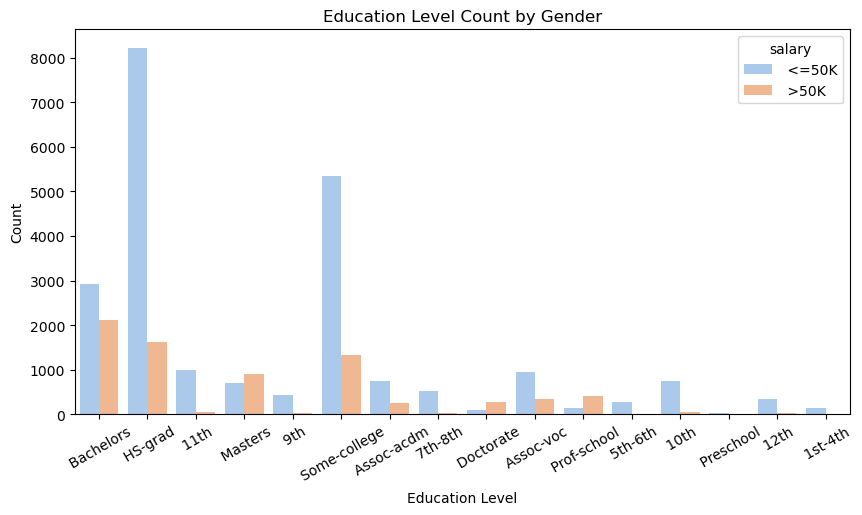

In [158]:
plt.figure(figsize=(10, 5))
sns.countplot(x='education', data=data, hue='salary', palette="pastel")
plt.title('Education Level Count by Gender')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.show()

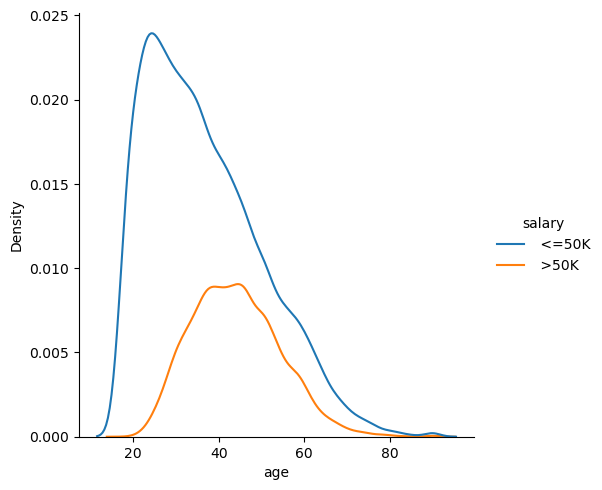

In [159]:
sns.displot(data=data, x="age", hue="salary", kind="kde", height=5, aspect=1)

<Axes: xlabel='marital-status', ylabel='Count'>

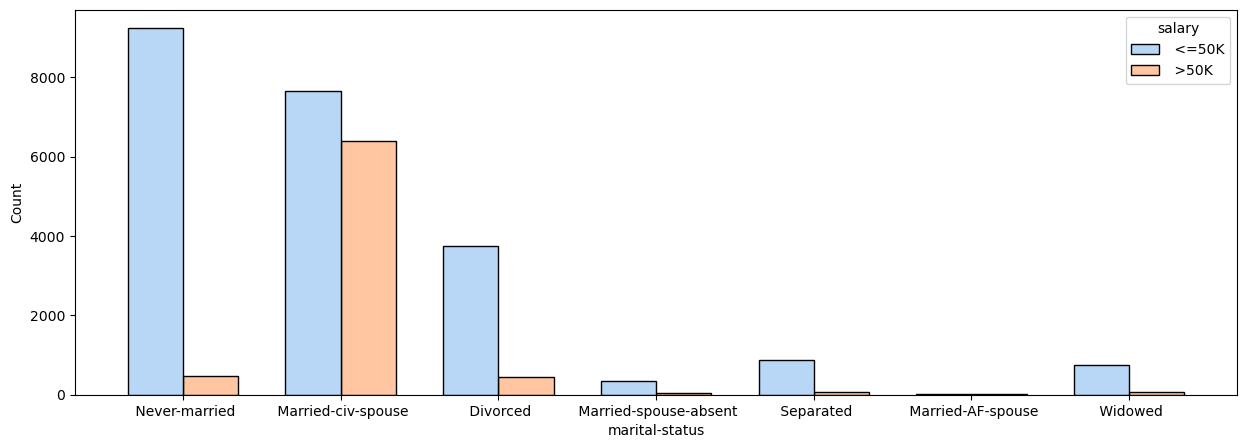

In [160]:
plt.figure(figsize=(15,5))
sns.histplot(data=data,x="marital-status",shrink=.7,multiple='dodge',hue='salary',palette='pastel')

# Modify categorical values

In [161]:
# Transform to binary features
data['sex'] = data['sex'].replace({' Female': 1, ' Male': -1}, inplace = False)

# Change workclass into boolean different features
workclass_dummies = pd.get_dummies(data['workclass'], prefix='workclass')
# Concatenate the new boolean columns to the original DataFrame
data = pd.concat([data, workclass_dummies], axis=1)
# Drop the original 'workclass' column if needed
data.drop('workclass', axis=1, inplace=True)

# Change education into LEVELS
data['education'] = data['education'].replace({' Preschool': 0, 
                                               ' 1st-4th': 1, 
                                               ' 5th-6th': 2, 
                                               ' 7th-8th': 3, 
                                               ' 9th': 4, 
                                               ' 10th': 5, 
                                               ' 11th': 6, 
                                               ' 12th': 7, 
                                               ' HS-grad': 8, 
                                               ' Some-college': 9, 
                                               ' Assoc-acdm': 10, 
                                               ' Assoc-voc': 11, 
                                               ' Bachelors': 12, 
                                               ' Masters': 13, 
                                               ' Doctorate': 14, 
                                               ' Prof-school': 15
                                              }, inplace = False)

# Change marital-status into boolean different features
marital_dummies = pd.get_dummies(data['marital-status'], prefix='marital-status')
# Concatenate the new boolean columns to the original DataFrame
data = pd.concat([data, marital_dummies], axis=1)
# Drop the original 'workclass' column if needed
data.drop('marital-status', axis=1, inplace=True)

# Change ocupation into boolean different features
occupation_dummies = pd.get_dummies(data['occupation'], prefix='occupation')
# Concatenate the new boolean columns to the original DataFrame
data = pd.concat([data, occupation_dummies], axis=1)
# Drop the original 'workclass' column if needed
data.drop('occupation', axis=1, inplace=True)

# Change relationship into boolean different features
relationship_dummies = pd.get_dummies(data['relationship'], prefix='relationship')
# Concatenate the new boolean columns to the original DataFrame
data = pd.concat([data, relationship_dummies], axis=1)
# Drop the original 'workclass' column if needed
data.drop('relationship', axis=1, inplace=True)

# Change race into boolean different features
race_dummies = pd.get_dummies(data['race'], prefix='race')
# Concatenate the new boolean columns to the original DataFrame
data = pd.concat([data, race_dummies], axis=1)
# Drop the original 'workclass' column if needed
data.drop('race', axis=1, inplace=True)


def segment_country(country):
    if country in [' United-States', ' Canada', ' England', ' Germany', ' France', ' Italy', ' Holand-Netherlands', ' Ireland', ' Scotland', ' Portugal', ' Greece']:
        return 0
    elif country in [' India', ' Japan', ' China', ' Hong', ' Taiwan', ' Philippines', ' Vietnam', ' Thailand', ' Laos']:
        return 1
    elif country in [' Mexico', ' Cuba', ' Jamaica', ' Puerto-Rico', ' Honduras', ' El-Salvador', ' Guatemala', ' Dominican-Republic', ' Nicaragua', ' Peru', ' Columbia']:
        return 2
    else:
        return 3

data['native-country'] = data['native-country'].apply(segment_country)

data['salary'] = data['salary'].replace({' <=50K': 0, 
                                               ' >50K': 1, 
                                              }, inplace = False)

#Check everything is being changed.
# Poseu com a comentari els prints de les classes canviades a booleans perq hauràs fet el drop
'''
print(data['race'].unique())
print(data['occupation'].unique())
print(data['relationship'].unique())
print(data['marital-status'].unique())
print(data['education'].unique())
print(data['workclass'].unique())
print(data['native-country'].unique())
print(data['salary'].unique())
'''

data

# Boolean for categorical with no order and ordered for the ones like education

,age,fnlwgt,education,education-num,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,...,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
0,39,77516,12,13,-1,2174,0,40,0,0,...,1,0,0,0,0,0,0,0,0,1
1,50,83311,12,13,-1,0,0,13,0,0,...,0,0,0,0,0,0,0,0,0,1
2,38,215646,8,9,-1,0,0,40,0,0,...,1,0,0,0,0,0,0,0,0,1
3,53,234721,6,7,-1,0,0,40,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,12,13,1,0,0,40,2,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,10,12,1,0,0,38,0,0,...,0,0,0,0,1,0,0,0,0,1
32557,40,154374,8,9,-1,0,0,40,0,1,...,0,0,0,0,0,0,0,0,0,1
32558,58,151910,8,9,1,0,0,40,0,0,...,0,0,0,1,0,0,0,0,0,1
32559,22,201490,8,9,-1,0,0,20,0,0,...,0,0,1,0,0,0,0,0,0,1


In [162]:
print(list(data.columns))

['age', 'fnlwgt', 'education', 'education-num', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'salary', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'marital-status_ Divorced', 'marital-status_ Married-AF-spouse', 'marital-status_ Married-civ-spouse', 'marital-status_ Married-spouse-absent', 'marital-status_ Never-married', 'marital-status_ Separated', 'marital-status_ Widowed', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Other-service', 'occupation_ Priv-house-serv', 'occupation_ Prof-specialty', 'occupation_ Protective-serv', 'occupation_ Sales', 'occupation_ Tech-support', 'occupation_ Transport-moving', 'relationship_ Husband', 'relationship_ 

# Outliers

In [163]:
'''
fig, axs = plt.subplots(15, 1, figsize=(15, 20), sharex=True)
data.plot(kind='kde', subplots=True, layout=(15, 1), ax=axs)
plt.subplots_adjust(wspace=0.5, hspace=0.5)  # Adjust the spacing
plt.suptitle("Kernel Density Estimation Plots", y=0.92)

plt.show()
'''

'\nfig, axs = plt.subplots(15, 1, figsize=(15, 20), sharex=True)\ndata.plot(kind=\'kde\', subplots=True, layout=(15, 1), ax=axs)\nplt.subplots_adjust(wspace=0.5, hspace=0.5)  # Adjust the spacing\nplt.suptitle("Kernel Density Estimation Plots", y=0.92)\n\nplt.show()\n'

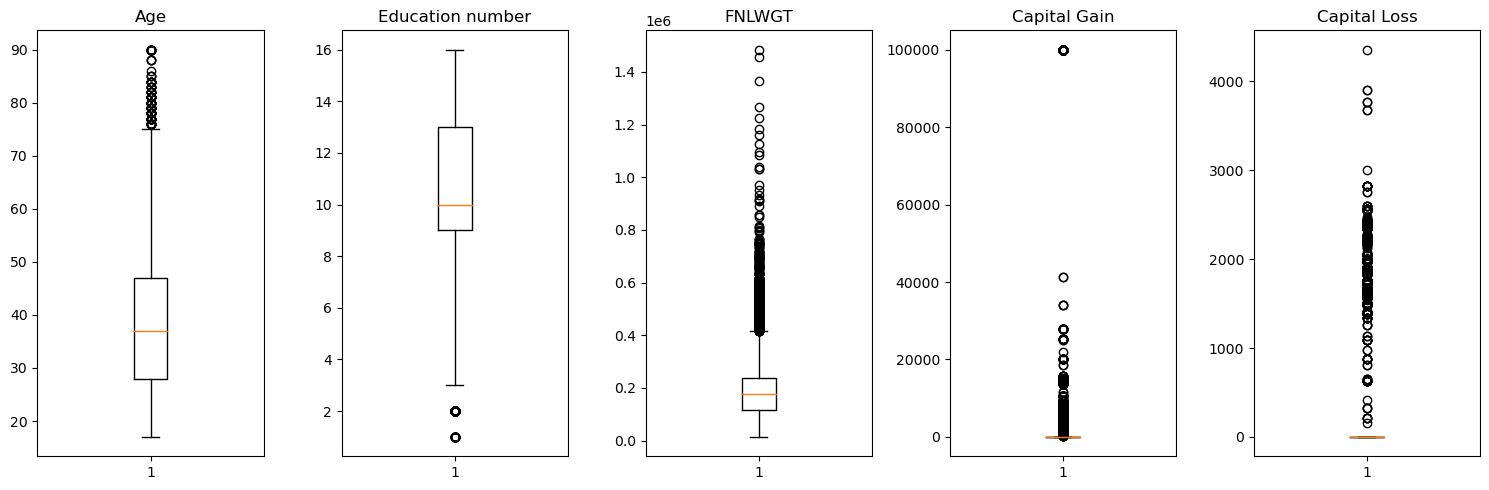

In [164]:
# Create a 1x4 grid of subplots
fig, axs = plt.subplots(1, 5, figsize=(15, 5))  # Adjust the figsize as needed

# Plot the boxplots in each subplot
axs[0].boxplot(data['age'])
axs[0].set_title('Age')

axs[1].boxplot(data['education-num'])
axs[1].set_title('Education number')

axs[2].boxplot(data['fnlwgt'])
axs[2].set_title('FNLWGT')

axs[3].boxplot(data['capital-gain'])
axs[3].set_title('Capital Gain')

axs[4].boxplot(data['capital-loss'])
axs[4].set_title('Capital Loss')

plt.tight_layout()
plt.show()

In [165]:
selected_columns = ['age', 'fnlwgt', 'hours-per-week', 'education-num']

# Calculate the IQR for the selected columns in the training data
Q1 = data[selected_columns].quantile(0.25)
Q3 = data[selected_columns].quantile(0.75)
IQR = Q3 - Q1

# Set different thresholds for 'age' and other columns
thresholds = {'age': 1, 'fnlwgt': 5, 'hours-per-week': 5, 'education-num': 5}

# Creating a mask for outliers in the selected columns
outlier_mask = pd.DataFrame()
for column in selected_columns:
    outlier_mask[column] = (data[column] < (Q1[column] - thresholds[column] * IQR[column])) | (data[column] > (Q3[column] + thresholds[column] * IQR[column]))

# Remove rows with outliers 
new_data = data[~outlier_mask.any(axis=1)]    # Data without the outliers
outliers_set = data[outlier_mask.any(axis=1)]  # Data containing the outliers

# Print the number of rows removed
num_rows_removed = len(outliers_set)
print(f"Number of rows removed due to outliers: {num_rows_removed}")

# CHECK THE RANGE
age_range_in_new_data = (new_data['age'].min(), new_data['age'].max())
print(f"Range of the 'age' feature in 'new data': {age_range_in_new_data}")

education_range_in_new_data = (new_data['education-num'].min(), new_data['education-num'].max())
print(f"Range of the 'education-num' feature in 'new data': {education_range_in_new_data}")

fnlwgt_range_in_new_data = (new_data['fnlwgt'].min(), new_data['fnlwgt'].max())
print(f"Range of the 'fnlwgt' feature in 'new data': {fnlwgt_range_in_new_data}")

hours_per_week_range_in_new_data = (new_data['hours-per-week'].min(), new_data['hours-per-week'].max())
print(f"Range of the 'hours-per-week' feature in 'new data': {hours_per_week_range_in_new_data}")

Number of rows removed due to outliers: 1778
Range of the 'age' feature in 'new data': (17, 66)
Range of the 'education-num' feature in 'new data': (1, 16)
Range of the 'fnlwgt' feature in 'new data': (13769, 816750)
Range of the 'hours-per-week' feature in 'new data': (15, 70)


In [166]:
''' # PER SI NECESSITEM TORNAR A TREURE OUTLIERS DE CAPITAL GAIN I LOSS
selected_columns = ['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week', 'education-num']

# Calculate the IQR for the selected columns in the training data
Q1 = data[selected_columns].quantile(0.25)
Q3 = data[selected_columns].quantile(0.75)
IQR = Q3 - Q1

# Set different thresholds for 'age' and other columns
thresholds = {'age': 1, 'fnlwgt': 5, 'capital-gain': 5, 'capital-loss': 5, 'hours-per-week': 5, 'education-num': 5}

# Creating a mask for outliers in the selected columns
outlier_mask = pd.DataFrame()
for column in selected_columns:
    outlier_mask[column] = (data[column] < (Q1[column] - thresholds[column] * IQR[column])) | (data[column] > (Q3[column] + thresholds[column] * IQR[column]))

# Remove rows with outliers 
new_data = data[~outlier_mask.any(axis=1)]    # Data without the outliers
outliers_set = data[outlier_mask.any(axis=1)]  # Data containing the outliers

# Print the number of rows removed
num_rows_removed = len(outliers_set)
print(f"Number of rows removed due to outliers: {num_rows_removed}")

# CHECK THE RANGE
age_range_in_new_data = (new_data['age'].min(), new_data['age'].max())
print(f"Range of the 'age' feature in 'new data': {age_range_in_new_data}")

education_range_in_new_data = (new_data['education-num'].min(), new_data['education-num'].max())
print(f"Range of the 'education-num' feature in 'new data': {education_range_in_new_data}")

fnlwgt_range_in_new_data = (new_data['fnlwgt'].min(), new_data['fnlwgt'].max())
print(f"Range of the 'fnlwgt' feature in 'new data': {fnlwgt_range_in_new_data}")

capital_gain_range_in_new_data = (new_data['capital-gain'].min(), new_data['capital-gain'].max())
print(f"Range of the 'capital-gain' feature in 'new data': {capital_gain_range_in_new_data}")

capital_loss_range_in_new_data = (new_data['capital-loss'].min(), new_data['capital-loss'].max())
print(f"Range of the 'capital-loss' feature in 'new data': {capital_loss_range_in_new_data}")

hours_per_week_range_in_new_data = (new_data['hours-per-week'].min(), new_data['hours-per-week'].max())
print(f"Range of the 'hours-per-week' feature in 'new data': {hours_per_week_range_in_new_data}")
'''

' # PER SI NECESSITEM TORNAR A TREURE OUTLIERS DE CAPITAL GAIN I LOSS\nselected_columns = [\'age\', \'fnlwgt\', \'capital-gain\', \'capital-loss\', \'hours-per-week\', \'education-num\']\n\n# Calculate the IQR for the selected columns in the training data\nQ1 = data[selected_columns].quantile(0.25)\nQ3 = data[selected_columns].quantile(0.75)\nIQR = Q3 - Q1\n\n# Set different thresholds for \'age\' and other columns\nthresholds = {\'age\': 1, \'fnlwgt\': 5, \'capital-gain\': 5, \'capital-loss\': 5, \'hours-per-week\': 5, \'education-num\': 5}\n\n# Creating a mask for outliers in the selected columns\noutlier_mask = pd.DataFrame()\nfor column in selected_columns:\n    outlier_mask[column] = (data[column] < (Q1[column] - thresholds[column] * IQR[column])) | (data[column] > (Q3[column] + thresholds[column] * IQR[column]))\n\n# Remove rows with outliers \nnew_data = data[~outlier_mask.any(axis=1)]    # Data without the outliers\noutliers_set = data[outlier_mask.any(axis=1)]  # Data containi

---
We need to choose a threshold to eliminate the outliers in our dataset
* A smaller threshold will be less likely to flag data points as outliers, but it may miss some true anomalies. 
* On the other hand, a larger  threshold will be more sensitive to outliers but may also flag more false positives. 

We should visually inspect how our data changes with each value of thresholds to see the ranges of each feature and see if they make sense inside the desired values and if the outliers have been removed successfuly.

After Moha's insight, 5 is a better threshold than 1.5 because the latter removes too many rows. Even 5 is removing a lot, usually the outliers are not that much. So we should evaluate similar higher values.

---

# Split of data: training, validation and test set

Random seed allows us to work with the same training and testing data in different executions

In [167]:
# Split our data (60/20/20) or (70/15/15). 
from sklearn.model_selection import train_test_split
X = new_data.drop("salary", axis=1)  # Features
y = new_data["salary"]  # Target

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state = RANDOM_SEED)

X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state = RANDOM_SEED)

X_train, X_test, X_val, y_train, y_test, y_val 
70/15/15

# Data normalization (0, 1)

In [168]:
for column in X_train.columns: #Normalize: z-score
    X_train[column] = (X_train[column] - X_train[column].mean())/ X_train[column].std()
X_train

,age,fnlwgt,education,education-num,sex,capital-gain,capital-loss,hours-per-week,native-country,workclass_ Federal-gov,...,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
24412,1.857131,-0.668351,-1.650093,-1.653727,1.453098,-0.147043,-0.222589,-0.124707,-0.261487,-0.18044,...,1.705883,-0.175469,-0.410167,-0.347950,-0.224056,-0.096455,-0.174398,-0.323992,-0.085477,0.405126
30189,2.190708,-0.350591,1.116700,1.129199,1.453098,-0.147043,-0.222589,-0.124707,3.618215,-0.18044,...,-0.586177,-0.175469,-0.410167,2.873832,-0.224056,-0.096455,-0.174398,-0.323992,-0.085477,0.405126
28720,-0.811491,1.044316,-0.069068,-0.063483,-0.688150,-0.147043,-0.222589,-0.124707,-0.261487,-0.18044,...,-0.586177,-0.175469,-0.410167,-0.347950,-0.224056,-0.096455,-0.174398,-0.323992,-0.085477,0.405126
5367,-1.728829,1.332323,-1.650093,-1.653727,-0.688150,-0.147043,-0.222589,-2.207736,-0.261487,-0.18044,...,-0.586177,-0.175469,2.437906,-0.347950,-0.224056,-0.096455,-0.174398,-0.323992,-0.085477,0.405126
11685,1.106581,-1.422559,-1.254836,-1.256166,-0.688150,-0.147043,-0.222589,-0.124707,-0.261487,-0.18044,...,-0.586177,-0.175469,-0.410167,-0.347950,-0.224056,-0.096455,-0.174398,-0.323992,-0.085477,0.405126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15070,0.856397,-0.333426,1.116700,1.129199,-0.688150,-0.147043,-0.222589,-0.645464,-0.261487,-0.18044,...,-0.586177,-0.175469,-0.410167,-0.347950,-0.224056,-0.096455,-0.174398,-0.323992,-0.085477,0.405126
22562,0.606214,0.373584,-0.464324,-0.461044,1.453098,-0.147043,-0.222589,-0.645464,-0.261487,-0.18044,...,-0.586177,-0.175469,-0.410167,-0.347950,4.462943,-0.096455,-0.174398,-0.323992,-0.085477,0.405126
11314,2.107314,0.044953,1.907212,2.321882,-0.688150,-0.147043,4.414512,0.916808,-0.261487,-0.18044,...,-0.586177,-0.175469,-0.410167,-0.347950,-0.224056,-0.096455,-0.174398,-0.323992,-0.085477,0.405126
12418,-0.561308,1.039011,1.511956,1.526760,1.453098,-0.147043,-0.222589,1.958322,-0.261487,-0.18044,...,1.705883,-0.175469,-0.410167,-0.347950,-0.224056,-0.096455,-0.174398,-0.323992,-0.085477,0.405126


<Axes: >

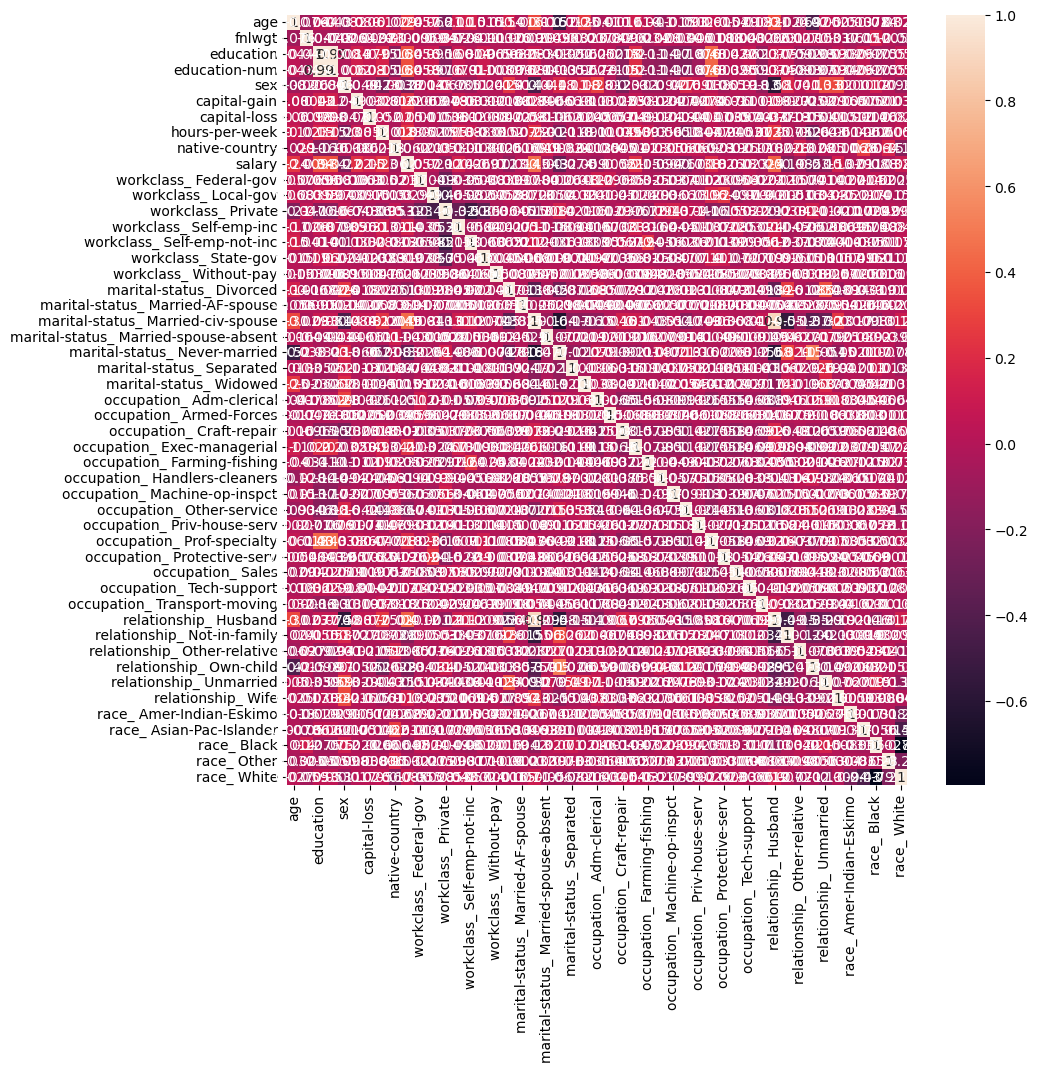

In [169]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)
# Si es fa amb el X_train, es perd el target

# Feature selection

---
Selection of the important features according to correlation

---

In [170]:
X_train.isnull().sum()

age                                      0
fnlwgt                                   0
education                                0
education-num                            0
sex                                      0
capital-gain                             0
capital-loss                             0
hours-per-week                           0
native-country                           0
workclass_ Federal-gov                   0
workclass_ Local-gov                     0
workclass_ Private                       0
workclass_ Self-emp-inc                  0
workclass_ Self-emp-not-inc              0
workclass_ State-gov                     0
workclass_ Without-pay                   0
marital-status_ Divorced                 0
marital-status_ Married-AF-spouse        0
marital-status_ Married-civ-spouse       0
marital-status_ Married-spouse-absent    0
marital-status_ Never-married            0
marital-status_ Separated                0
marital-status_ Widowed                  0
occupation_

In [179]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)
variance_ratio = pca.explained_variance_ratio_
variance_ratio

array([8.59904893e-02, 5.88314727e-02, 4.63851261e-02, 4.05795807e-02,
       3.54969773e-02, 3.27778138e-02, 2.90586134e-02, 2.74358907e-02,
       2.59614190e-02, 2.49759290e-02, 2.46534938e-02, 2.37941130e-02,
       2.37517918e-02, 2.32255589e-02, 2.28057087e-02, 2.25247603e-02,
       2.20184762e-02, 2.18316307e-02, 2.17197196e-02, 2.16515536e-02,
       2.14290273e-02, 2.11444670e-02, 2.10020962e-02, 2.08512520e-02,
       2.06679026e-02, 2.05668193e-02, 2.05201933e-02, 2.02609264e-02,
       1.95707171e-02, 1.92668268e-02, 1.90291995e-02, 1.88472236e-02,
       1.86263955e-02, 1.64699879e-02, 1.53786815e-02, 1.48667723e-02,
       1.32594663e-02, 1.31091565e-02, 1.16898504e-02, 9.76661342e-03,
       7.60129028e-03, 4.27869481e-04, 1.77146681e-04, 1.69586338e-32,
       1.98549523e-33, 1.51341346e-33, 4.78700053e-34, 4.25333709e-34])

In [183]:
variance_ratio[:38].sum()

0.9703372297471434

In [184]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
Xcentered = scaler.transform(X_train)

pca = PCA(n_components=12)
pca.fit(Xcentered)

components = pd.DataFrame(pca.components_, columns=X_train.columns)
explained_variance = pd.DataFrame({'Explained Variance Ratio': pca.explained_variance_ratio_})

data_transformed = pd.DataFrame(pca.transform(Xcentered), columns=[f'PC{i}' for i in range(1, 13)])

print("Original size of our dataset: ", Xcentered.shape)
print("Reduced size of our dataset: ", data_transformed.shape)

print("\nPrincipal Components:")
print(components)

print("\nExplained Variance Ratio:")
print(explained_variance)

print("\nTransformed Data:")
data_transformed

Original size of our dataset:  (19852, 48)
Reduced size of our dataset:  (19852, 12)

Principal Components:
         age    fnlwgt  education  education-num       sex  capital-gain  \
0   0.235684 -0.038312   0.160706       0.159450 -0.269021      0.077514   
1  -0.055902  0.063251  -0.461305      -0.462671 -0.216371     -0.070466   
2   0.338953  0.004957  -0.169973      -0.169757  0.174570     -0.015907   
3  -0.177179  0.090096   0.155754       0.156044 -0.103744      0.029214   
4  -0.048275 -0.020168  -0.178305      -0.178588 -0.128362     -0.068591   
5  -0.052762 -0.057912  -0.046402      -0.045563  0.304998     -0.041915   
6   0.014801 -0.096265  -0.019099      -0.019187  0.119058      0.116293   
7   0.021001  0.061258  -0.011509      -0.013684  0.004759     -0.037735   
8   0.007197 -0.059554  -0.046864      -0.045637  0.014006     -0.031432   
9   0.043721 -0.184271   0.036982       0.034178  0.041660     -0.122743   
10  0.072128  0.099799  -0.076834      -0.075926  0.0570

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,-1.493806,0.488935,1.833454,-3.049812,-0.308500,-0.188756,1.209416,-0.280996,-0.992876,0.690432,2.834184,-2.945960
1,-1.144023,-1.240604,0.698401,-0.348024,-1.654112,-0.148754,1.831708,0.028296,-2.243297,-0.877319,-0.157194,0.592386
2,1.220385,1.794238,-0.510976,0.053127,-1.098880,0.246767,-0.913448,0.643852,-0.139541,0.322572,0.485030,0.892999
3,-2.910226,2.186291,-2.486031,0.213859,0.726135,0.884886,0.246893,-1.380763,-1.406299,-0.335639,0.463529,0.114697
4,1.709330,2.596568,0.291502,-0.982089,-0.003417,0.040406,-0.624377,0.146080,0.126258,0.815958,-0.800796,-0.490142
...,...,...,...,...,...,...,...,...,...,...,...,...
19847,1.674080,-0.330907,-0.278127,0.063128,-1.271841,1.080622,-0.650689,-0.277696,1.072201,-0.051936,-0.131136,0.247407
19848,0.092294,0.363435,0.348048,-0.604570,-1.737611,3.303665,1.371177,-0.258451,-0.444023,0.973090,1.861665,-0.666226
19849,4.107421,-2.822410,0.081699,0.644752,0.234905,0.084469,0.083990,-0.218553,0.513987,-1.411977,-1.989041,-1.598408
19850,-0.783641,-3.076294,-1.837715,0.044264,-0.815368,-1.306682,-0.167283,1.233760,-0.196435,0.899742,0.982412,0.718832


# Balance data compare with unbalanced

In [28]:
print(data.sex.value_counts())
print(data.salary.value_counts())

-1    20366
 1     9773
Name: sex, dtype: int64
0    22633
1     7506
Name: salary, dtype: int64


In [29]:
# Canviar el valor a X_train?
from sklearn.utils import resample
data['salary'] = data['salary'].astype('float64')

# Separate the majority and minority classes
majority_class = data[data['salary'] == ]
minority_class = data[data['salary'] == ]
print(data.salary.value_counts())
print(len(majority_class))

# Undersample the majority class
#majority_class_downsampled = resample(majority_class, replace=False, n_samples=len(minority_class), random_state=42)
majority_class_downsampled = majority_class.sample(len(minority_class))

# Combine the undersampled majority class with the minority class
balanced_data = pd.concat([majority_class_downsampled, minority_class])

print(balanced_data.salary.value_counts())


SyntaxError: invalid syntax (3261109418.py, line 6)

# Training process

In [187]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
model = clf.fit(X_train, y_train)
y_pred = model.predict(X_val)
print("Accuracy on Test Data : {:,.2f}".format(clf.score(X_test , y_test) *100 ) , '%')
plot_confusion_matrix(model, X_val, y_val)
plt.title('RF: Confusion Matrix', )
plt.show()

Accuracy on Test Data : 68.85 %


NameError: name 'plot_confusion_matrix' is not defined

In [ ]:
from sklearn import tree
fig = plt.figure(figsize= (15,12))
tree.plot_tree(data, filled= True)